In [1]:
from fastbook import *
from fastai.vision.widgets import *

### Loading the Exported pkl file
- Now that we have exported the pkl file, we can load it in our application code to use as an inference
- Make sure that your path is actually correct, without any specific path, it will default to current folder like other functions
- After loading, we can test the model with select images to see that the inference is working correctly
- You can also see the categories in your DataLoaders in case you forget or if you were not the one who trained the model

In [2]:
learn_inf = load_learner('export.pkl')

In [3]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([5.1020e-07, 1.0000e+00, 6.5046e-07]))

In [6]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

### Creating the Application
- You can create the application inside of Notebook
- Basically follows the standard development procedure:
    - Get a barebones application functioning locally
    - Optional to deploy it
    - I have already done that with ```minimal``` which was led in fastai lecture 2 using huggingfaces
- To build an application in notebooks, you just need IPython widgets and Voila (included in the fastbook import):
    - IPython Widgets: brings JS and Python together with GUI componenets
    - Voila: takes advantage that a notebook is already kind of a web application that depends on Jupter
        - Basically turns Jupyter notebooks in standalone web applications

In [22]:
# simple button upload example using widgets, with this we can upload images our model can predict the category on
btn_upload = widgets.FileUpload(multiple=True)
btn_upload

FileUpload(value={}, description='Upload', multiple=True)

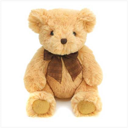

In [30]:
img = PILImage.create(btn_upload.data[-1])
img.resize((128, 128))

In [31]:
pred, pred_idx, probs = learn_inf.predict(img)

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [32]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

### Simple Application in Notebook
- Now that we know how to upload an image using IPython Widgets and predicting it using our trained model, we can build a simple application
- We first need to define a function that will be our event handler:
    - Event Handler: handling an event that happens in our application
    - EX: click event
    - This event handler will handle taking the image that is uploaded, resizing it to 128px by 128px since that is our specified size, and then taking our prediction, our prediction index, and the confidence/probability of that prediction
- Now that everything works in our notebook, we can choose to deploy it online so others can replicate our results:
    - Easily done with Voila and Binder
    - Binder: opens notebook in an executable environment that can be shared with anyone anywhere (hosting)


In [ ]:
btn_run = widgets.Button(description='Classify')

In [47]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1]) #grabs the last image that was uploaded
    out_pl.clear_output() #clear the previous image from our label
    with out_pl: display(img.to_thumb(128,128)) #open and display our new image
    pred,pred_idx,probs = learn_inf.predict(img) #use our inference and get the values of our prediction, prediction index, and probability of the image being that prediction
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}' #make a new label that has the prediction and probability
    
btn_run.on_click(on_click_classify) #link the event handler function with what happens when you click on classify

In [44]:
btn_upload = widgets.FileUpload()

In [51]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred]) #makes the application

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 